In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

In [3]:
seed = 83645671

In [4]:
data = pd.read_csv('data_SHAP.csv')
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [5]:
sp = RepeatedStratifiedKFold(random_state=seed,n_repeats=3,n_splits=5)

In [12]:
import hyperopt
from hyperopt import hp

In [13]:
def objective(params):
    aucs = []
    for train_index,test_index in sp.split(X,y):
        X_train = X.iloc[train_index,:]
        X_vali = X.iloc[test_index,:]
        y_train = y[train_index]
        y_vali = y[test_index]
        model = GradientBoostingClassifier(random_state=seed,
                                           learning_rate=0.1,
                                           validation_fraction=0.2,
                                           n_estimators=params['n_estimators'],
                                           max_depth=params['max_depth'],
                                           min_samples_split=params['min_samples_split'],
                                           min_samples_leaf=params['min_samples_leaf'])
        model.fit(X_train,y_train)
        pro_vali = model.predict_proba(X_vali)[:,1]
        auc_vali = roc_auc_score(y_vali,pro_vali)
        aucs.append(auc_vali)
    return -np.mean(aucs)

In [14]:
space = {
    'n_estimators':hp.choice('n_estimators',range(2,50)),
    'max_depth':hp.choice('max_depth',range(1,5)),
    'min_samples_split':hp.choice('min_samples_split',range(2,50)),
    'min_samples_leaf':hp.choice('min_samples_leaf',range(2,50)),
}

In [15]:
best_param = hyperopt.fmin(objective,space,hyperopt.tpe.suggest,max_evals=50)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:29<00:00,  1.72trial/s, best loss: -0.9953333333333333]


In [16]:
best_param

{'max_depth': np.int64(1),
 'min_samples_leaf': np.int64(12),
 'min_samples_split': np.int64(11),
 'n_estimators': np.int64(47)}

In [6]:
model = GradientBoostingClassifier(random_state=seed,
                                   learning_rate=0.1,
                                   validation_fraction=0.2,
                                   n_estimators=range(2,50)[47],
                                   max_depth=range(1,5)[1],
                                   min_samples_split=range(2,50)[11],
                                   min_samples_leaf=range(2,50)[12])
model.fit(X,y)

GradientBoostingClassifier(max_depth=2, min_samples_leaf=14,
                           min_samples_split=13, n_estimators=49,
                           random_state=83645671, validation_fraction=0.2)

In [7]:
def func(X):
    return model.predict_proba(X)[:,1]

In [8]:
explainer = shap.KernelExplainer(func,X)
shap_values = explainer.shap_values(X)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

<Figure size 1920x1440 with 0 Axes>

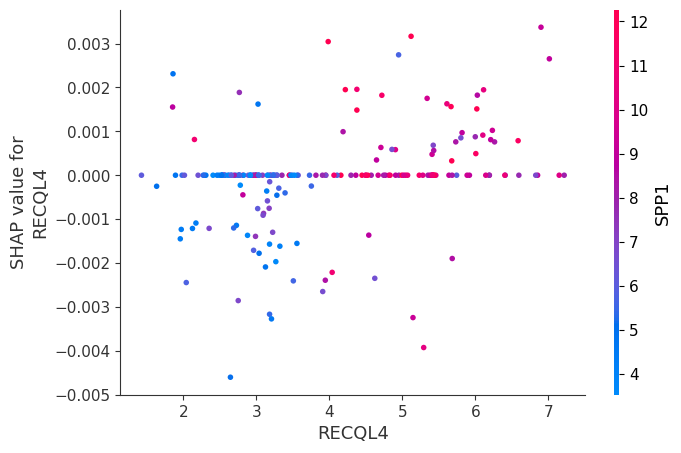

In [9]:
plt.figure(dpi=300)
shap.dependence_plot('RECQL4',shap_values,X,show=False)
plt.savefig('GBDT_RECQL4.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

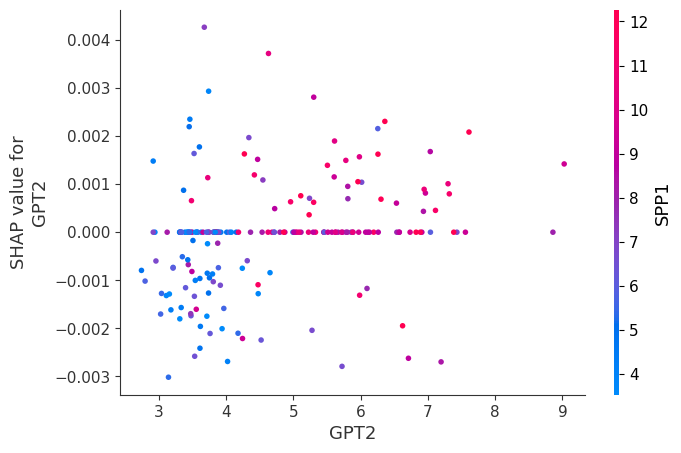

In [22]:
plt.figure(dpi=300)
shap.dependence_plot('GPT2',shap_values,X,show=False)
plt.savefig('GBDT_GPT2.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

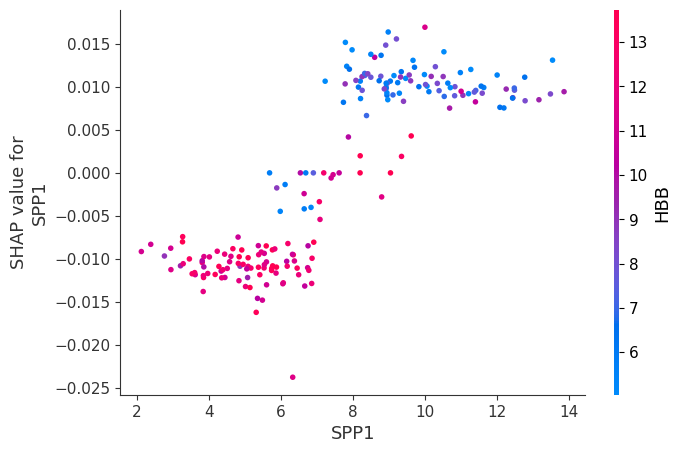

In [10]:
plt.figure(dpi=300)
shap.dependence_plot('SPP1',shap_values,X,show=False,interaction_index='HBB')
plt.savefig('GBDT_SPP1.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

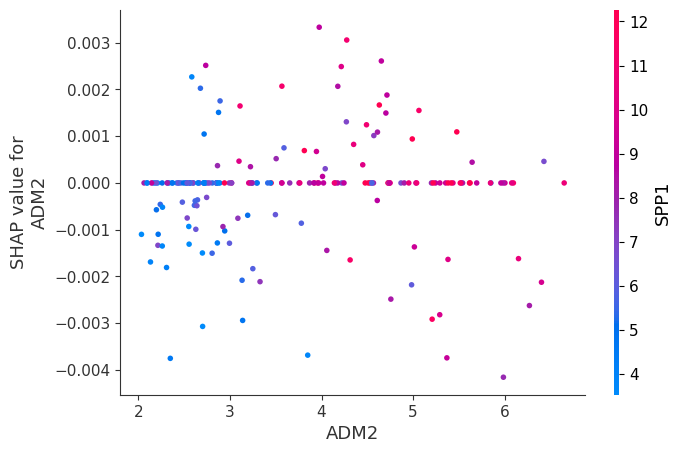

In [24]:
plt.figure(dpi=300)
shap.dependence_plot('ADM2',shap_values,X,show=False)
plt.savefig('GBDT_ADM2.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

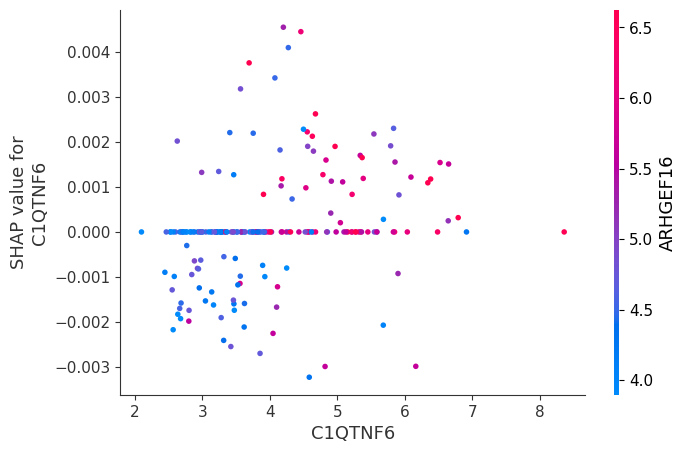

In [25]:
plt.figure(dpi=300)
shap.dependence_plot('C1QTNF6',shap_values,X,show=False)
plt.savefig('GBDT_C1QTNF6.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

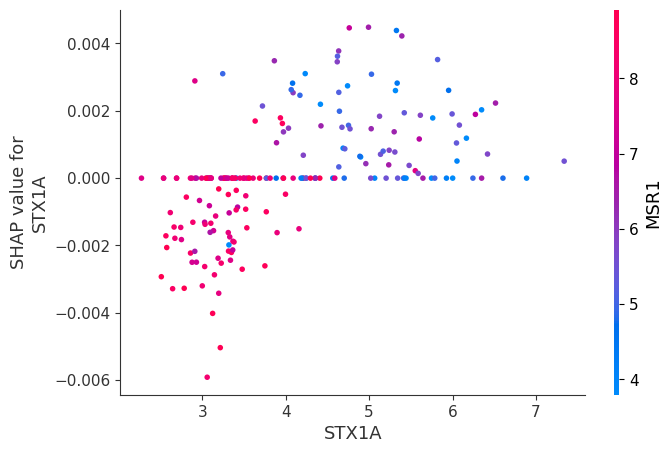

In [26]:
plt.figure(dpi=300)
shap.dependence_plot('STX1A',shap_values,X,show=False)
plt.savefig('GBDT_STX1A.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

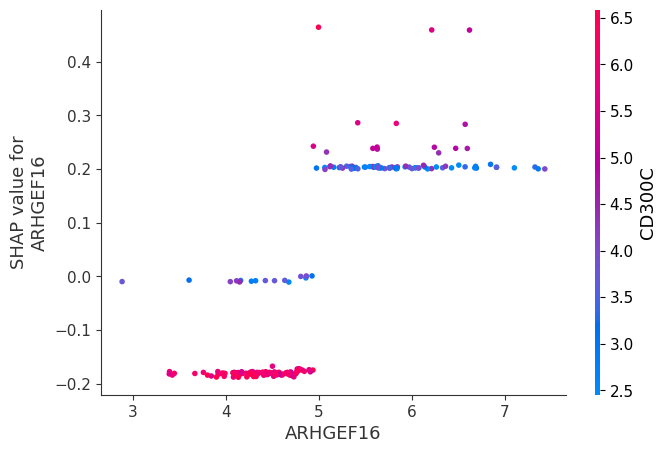

In [27]:
plt.figure(dpi=300)
shap.dependence_plot('ARHGEF16',shap_values,X,show=False)
plt.savefig('GBDT_ARHGEF16.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

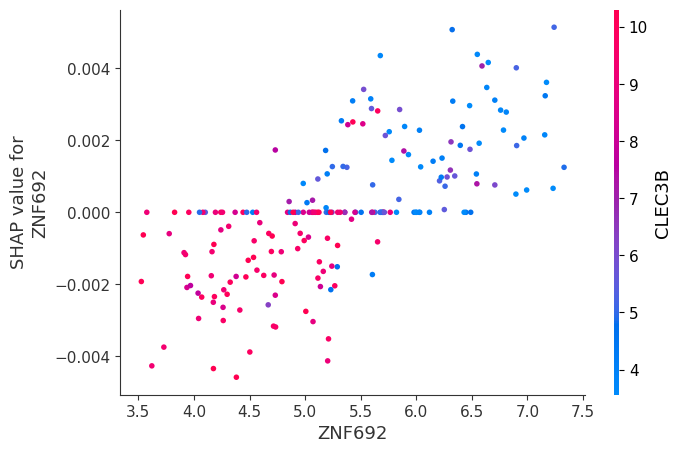

In [28]:
plt.figure(dpi=300)
shap.dependence_plot('ZNF692',shap_values,X,show=False)
plt.savefig('GBDT_ZNF692.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

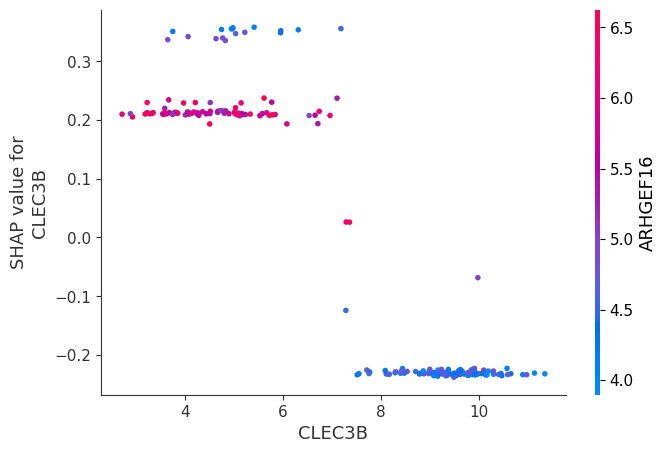

In [29]:
plt.figure(dpi=300)
shap.dependence_plot('CLEC3B',shap_values,X,show=False)
plt.savefig('GBDT_CLEC3B.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

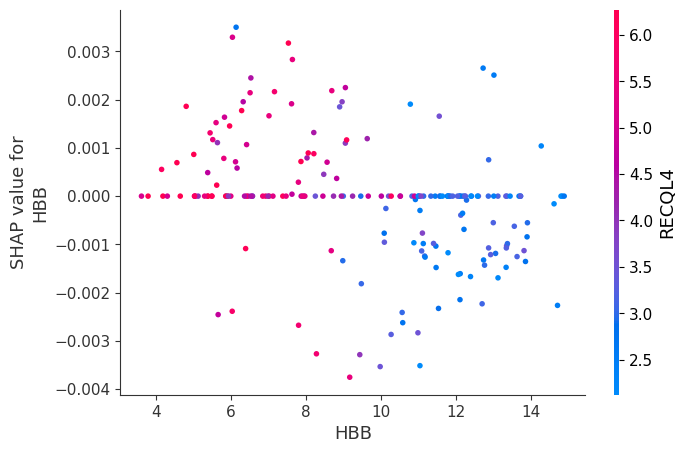

In [30]:
plt.figure(dpi=300)
shap.dependence_plot('HBB',shap_values,X,show=False)
plt.savefig('GBDT_HBB.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

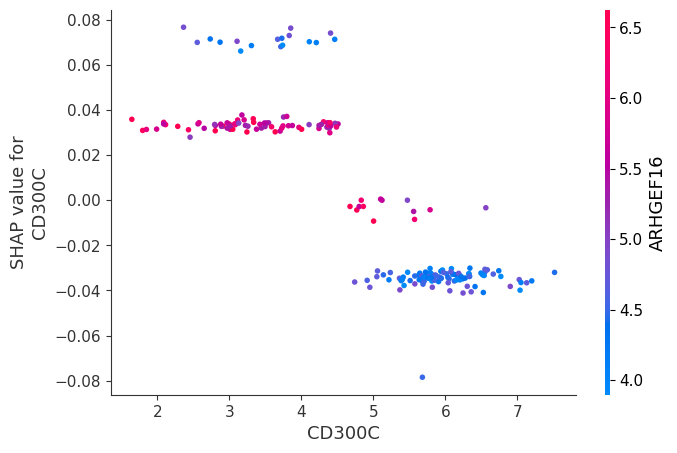

In [31]:
plt.figure(dpi=300)
shap.dependence_plot('CD300C',shap_values,X,show=False)
plt.savefig('GBDT_CD300C.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

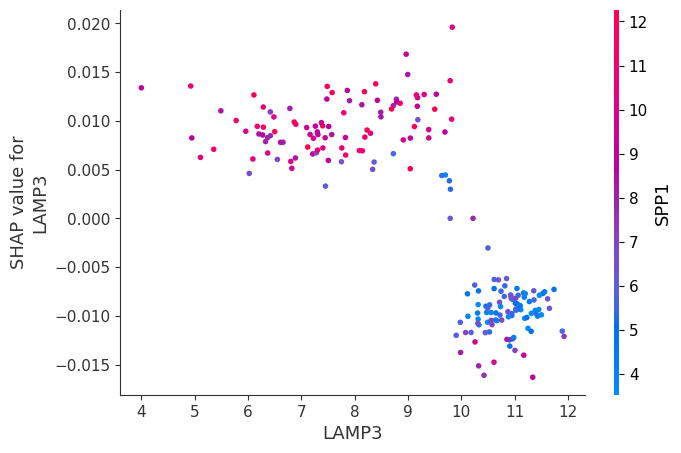

In [32]:
plt.figure(dpi=300)
shap.dependence_plot('LAMP3',shap_values,X,show=False)
plt.savefig('GBDT_LAMP3.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

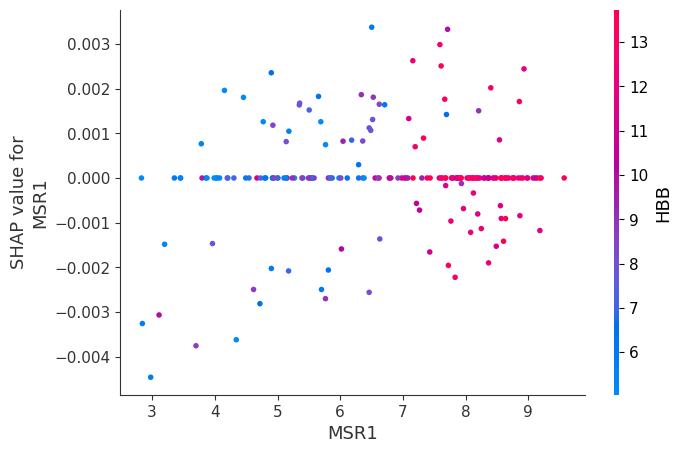

In [33]:
plt.figure(dpi=300)
shap.dependence_plot('MSR1',shap_values,X,show=False)
plt.savefig('GBDT_MSR1.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

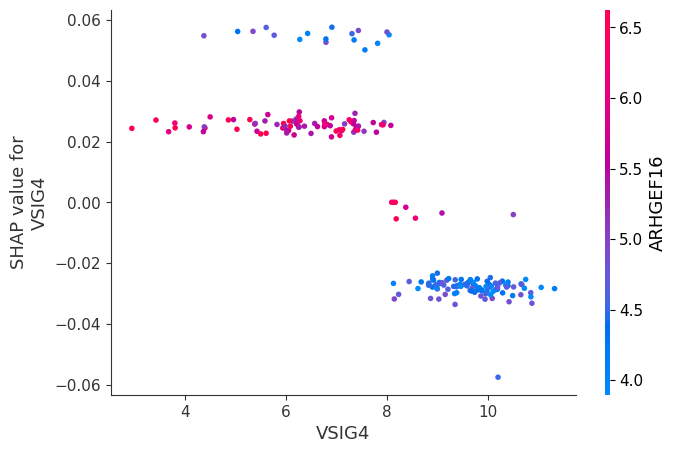

In [34]:
plt.figure(dpi=300)
shap.dependence_plot('VSIG4',shap_values,X,show=False)
plt.savefig('GBDT_VSIG4.png',dpi=600,bbox_inches='tight')

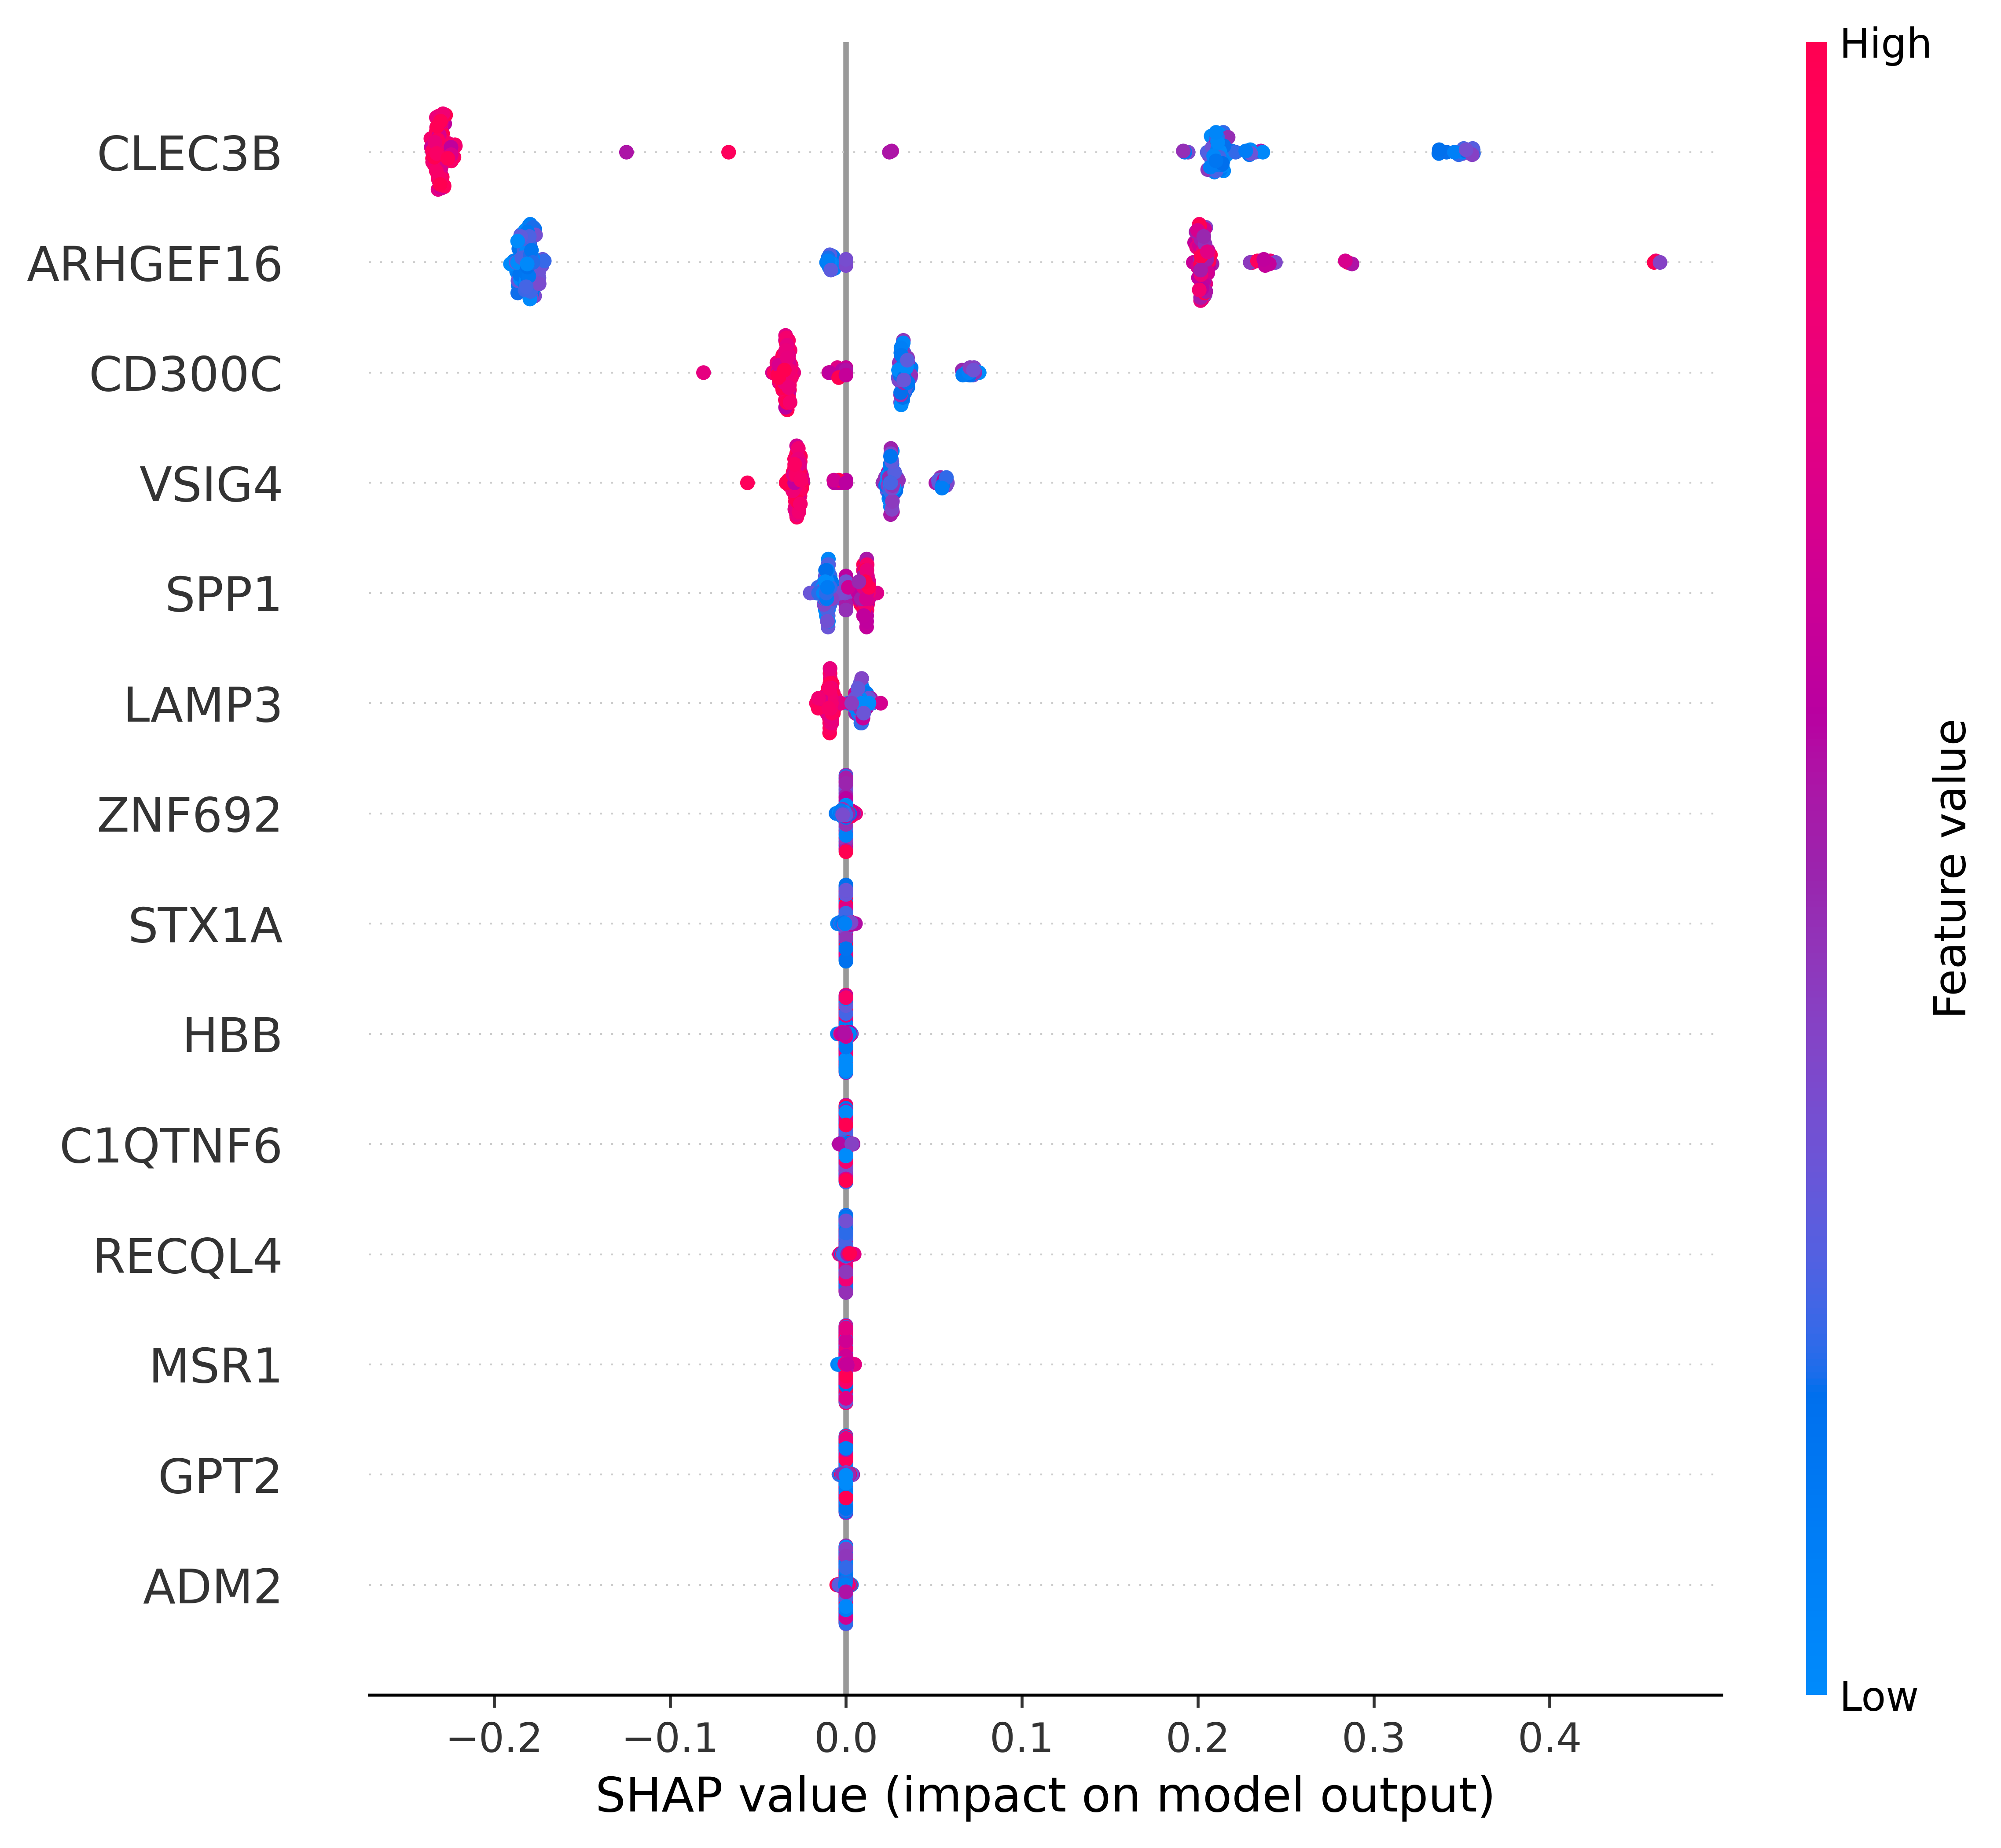

In [8]:
plt.figure(dpi=600)
shap.summary_plot(shap_values,X,show=False)
plt.savefig('GBDT_importance.png')
plt.show()